In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
from pprint import pprint
from config import OWM_key
from citipy import citipy
from pylab import figure

In [2]:
output_data_file = "cities.csv"


lat_range = (-90, 90)
lng_range = (-180, 180)

Lat = []
Lng = []
lat_lngs = []
cities = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Max_Temp = []
Wind_Speed = []


lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

580

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={OWM_key}&units={units}&q="
i = 0
for city in cities:
    response = requests.get(query_url + city).json()
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | beihai
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | haghig
City not found. Skipping...
Processing Record 10 of Set 1 | villarrica
City not found. Skipping...
Processing Record 11 of Set 1 | la asuncion
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | copiapo
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | caravelas
City not found. Skipping...
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | saint anthony
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | port hardy
Processing Record 22 of Set 1 | carnarvon
Process

Convert Raw Data to DataFrame

Export the city data into a .csv.

Display the DataFrame

In [4]:
weather_dict = {"City": City,"Lat": Lat,"Lng": Lng,"Max Temp": Max_Temp,"Humidity": Humidity,"Cloudiness":Cloudiness,"Wind Speed":Wind_Speed,"Country":Country,"Date":Date}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather_data.csv",encoding="utf-8",index=False)
print(f'City          {len(City)}')
print(f'Cloudiness    {len(Cloudiness)}')
print(f'Country       {len(Country)}')
print(f'Date          {len(Date)}')
print(f'Humidity      {len(Humidity)}')
print(f'Lat           {len(Lat)}')
print(f'Lng           {len(Lng)}')
print(f'Max Temp      {len(Max_Temp)}')
print(f'Wind Speed    {len(Wind_Speed)}')
weather_data.head()

City          517
Cloudiness    517
Country       517
Date          517
Humidity      517
Lat           517
Lng           517
Max Temp      517
Wind Speed    517


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.38,-173.30,8.00,93,90,4.00,RU,1594762686
1,Ushuaia,-54.80,-68.30,-1.00,100,40,0.88,AR,1594762619
2,Ribeira Grande,38.52,-28.70,22.00,78,20,7.20,PT,1594762686
3,Jamestown,42.10,-79.24,23.33,56,20,2.60,US,1594762622
4,Beihai,21.48,109.10,29.62,75,57,3.32,CN,1594762686


Inspect the data and remove the cities where the humidity > 100%.

In [5]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,21.217137,20.816596,19.747718,72.649903,48.653772,3.327099,1.594763e+09
std,33.013215,87.980118,8.075353,20.382278,38.023988,2.262445,7.868899e+01
min,-54.800000,-175.200000,-1.000000,1.000000,0.000000,0.010000,1.594762e+09
25%,-7.380000,-53.260000,13.890000,62.000000,6.000000,1.560000,1.594763e+09
50%,24.520000,24.730000,21.330000,77.000000,45.000000,2.660000,1.594763e+09
75%,49.500000,94.770000,25.400000,88.000000,87.000000,4.520000,1.594763e+09
max,78.220000,179.320000,43.330000,100.000000,100.000000,13.760000,1.594763e+09


In [6]:
Clean_city_data = weather_data.loc[weather_data["Humidity"] < 100] 
Clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.38,-173.30,8.00,93,90,4.00,RU,1594762686
2,Ribeira Grande,38.52,-28.70,22.00,78,20,7.20,PT,1594762686
3,Jamestown,42.10,-79.24,23.33,56,20,2.60,US,1594762622
4,Beihai,21.48,109.10,29.62,75,57,3.32,CN,1594762686
5,Thompson,55.74,-97.86,17.00,88,90,4.10,CA,1594762648
...,...,...,...,...,...,...,...,...,...
511,Finote Selam,10.70,37.27,14.37,90,74,1.09,ET,1594762741
513,Saint-Joseph,-21.37,55.62,20.00,77,3,3.10,RE,1594762741
514,Jinchang,38.50,102.17,22.00,39,13,1.53,CN,1594762741
515,Ambilobe,-13.20,49.05,19.44,86,47,1.36,MG,1594762735


In [7]:
Clean_city_df = Clean_city_data.to_csv("Clean_city_data.csv",encoding="utf-8", index=False)

Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

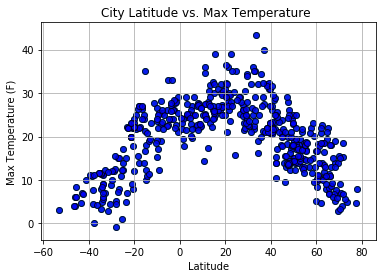

In [29]:
x_values = Clean_city_data['Lat']
y_values = Clean_city_data['Max Temp']
plt.title("City Latitude vs. Max Temperature ")
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.savefig("Lat_vs_Temp.png")
plt.show()

 Latitude vs. Humidity Plot

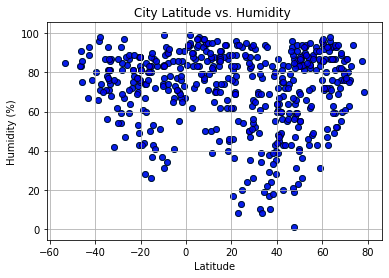

In [9]:
x_values = Clean_city_data['Lat']
y_values = Clean_city_data['Humidity']
plt.title("City Latitude vs. Humidity ")
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.savefig("Lat_vs_Humidity.png")
plt.show()

Latitude vs. Cloudiness Plot

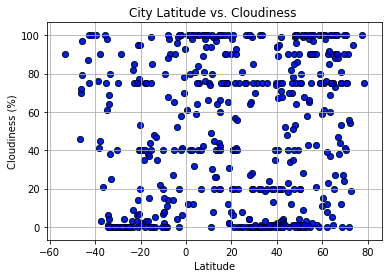

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = Clean_city_data['Lat']
y_values = Clean_city_data['Cloudiness']
plt.title("City Latitude vs. Cloudiness ")
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.savefig('Lat_vs_Cloundiness.png')
plt.show()

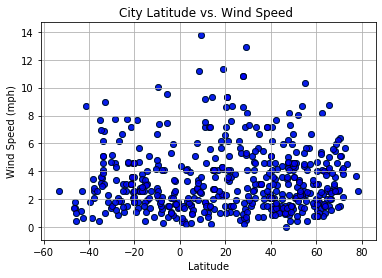

In [11]:
x_values = Clean_city_data['Lat']
y_values = Clean_city_data['Wind Speed']
plt.title("City Latitude vs. Wind Speed ")
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.savefig('Lat_vs_WindSpeed.png')
plt.show()

Linear Regression

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
North_data = Clean_city_data.loc[Clean_city_data["Lat"] > 0]
North_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.38,-173.30,8.00,93,90,4.00,RU,1594762686
2,Ribeira Grande,38.52,-28.70,22.00,78,20,7.20,PT,1594762686
3,Jamestown,42.10,-79.24,23.33,56,20,2.60,US,1594762622
4,Beihai,21.48,109.10,29.62,75,57,3.32,CN,1594762686
5,Thompson,55.74,-97.86,17.00,88,90,4.10,CA,1594762648
...,...,...,...,...,...,...,...,...,...
508,La Rosa,15.35,-87.07,39.00,74,75,3.60,HN,1594762740
509,Vanavara,60.34,102.28,16.55,86,15,0.78,RU,1594762740
511,Finote Selam,10.70,37.27,14.37,90,74,1.09,ET,1594762741
514,Jinchang,38.50,102.17,22.00,39,13,1.53,CN,1594762741


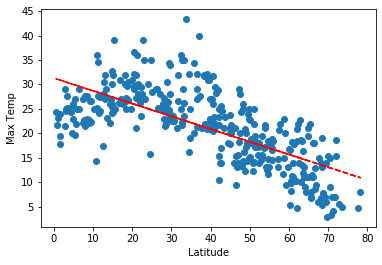

The r-squared is -0.69


In [13]:
Latitude = North_data['Lat']
Max_Temp = North_data['Max Temp']
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latitude, Max_Temp)
vc_fit = vc_slope * Latitude + vc_int
plt.scatter(Latitude,Max_Temp)
plt.plot(Latitude,vc_fit,"r--")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig('Lat_vs_Temp_N.png')
plt.show()
correlation = st.pearsonr(Latitude,Max_Temp)
print(f"The r-squared is {round(correlation[0],2)}")

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
South_data = Clean_city_data.loc[Clean_city_data["Lat"] < 0]
South_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,Hobart,-42.88,147.33,7.00,93,75,2.60,AU,1594762483
9,Villarrica,-25.75,-56.43,10.86,84,0,1.89,PY,1594762686
11,Hermanus,-34.42,19.23,5.00,93,6,3.52,ZA,1594762687
12,Vanimo,-2.67,141.30,26.02,82,100,2.42,PG,1594762687
13,Copiapó,-27.37,-70.33,15.00,67,0,2.10,CL,1594762687
...,...,...,...,...,...,...,...,...,...
502,Muriti,-1.98,32.92,22.00,78,40,2.60,TZ,1594762740
506,Wellington,-41.29,174.78,10.00,76,100,8.70,NZ,1594761987
510,Mwense,-10.38,28.70,18.57,37,0,4.17,ZM,1594762740
513,Saint-Joseph,-21.37,55.62,20.00,77,3,3.10,RE,1594762741


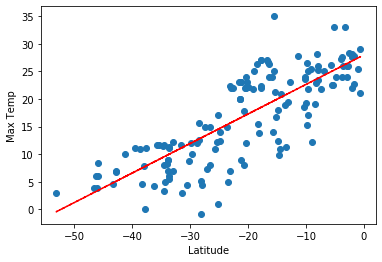

The r-squared is 0.8


In [15]:
Latitude = South_data['Lat']
Max_Temp = South_data['Max Temp']
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latitude, Max_Temp)
vc_fit = vc_slope * Latitude + vc_int
plt.scatter(Latitude,Max_Temp)
plt.plot(Latitude,vc_fit,"r--")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig('Lat_vs_Temp_S.png')
plt.show()
correlation = st.pearsonr(Latitude,Max_Temp)
print(f"The r-squared is {round(correlation[0],2)}")

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

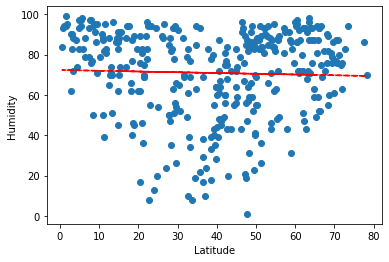

The r-squared is -0.03


In [16]:
Latitude = North_data['Lat']
Humidity = North_data['Humidity']
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latitude, Humidity)
vc_fit = vc_slope * Latitude + vc_int
plt.scatter(Latitude,Humidity)
plt.plot(Latitude,vc_fit,"r--")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('Lat_vs_Humidity_N.png')
plt.show()
correlation = st.pearsonr(Latitude,Humidity)
print(f"The r-squared is {round(correlation[0],2)}")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

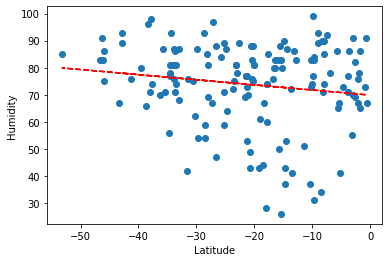

The r-squared is -0.15


In [17]:
Latitude = South_data['Lat']
Humidity = South_data['Humidity']
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latitude, Humidity)
vc_fit = vc_slope * Latitude + vc_int
plt.scatter(Latitude,Humidity)
plt.plot(Latitude,vc_fit,"r--")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('Lat_vs_Humidity_S.png')
plt.show()
correlation = st.pearsonr(Latitude,Humidity)
print(f"The r-squared is {round(correlation[0],2)}")

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

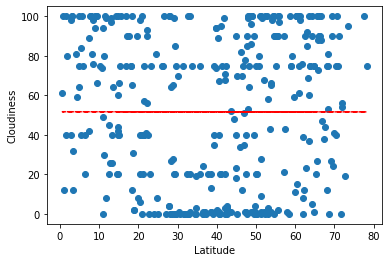

The r-squared is -0.0


In [18]:
Latitude = North_data['Lat']
Cloudiness = North_data['Cloudiness']
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latitude, Cloudiness)
vc_fit = vc_slope * Latitude + vc_int
plt.scatter(Latitude,Cloudiness)
plt.plot(Latitude,vc_fit,"r--")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('Lat_vs_Cloudiness_N.png')
plt.show()
correlation = st.pearsonr(Latitude,Cloudiness)
print(f"The r-squared is {round(correlation[0],2)}")

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

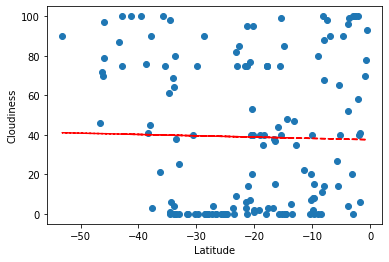

The r-squared is -0.02


In [19]:
Latitude = South_data['Lat']
Cloudiness = South_data['Cloudiness']
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latitude, Cloudiness)
vc_fit = vc_slope * Latitude + vc_int
plt.scatter(Latitude,Cloudiness)
plt.plot(Latitude,vc_fit,"r--")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('Lat_vs_Cloudiness_S.png')
plt.show()
correlation = st.pearsonr(Latitude,Cloudiness)
print(f"The r-squared is {round(correlation[0],2)}")

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

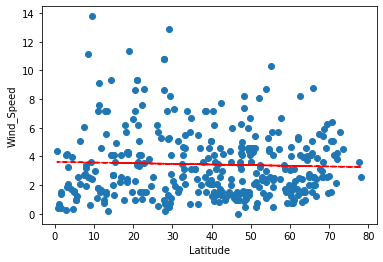

The r-squared is -0.04


In [20]:
Latitude = North_data['Lat']
Wind_Speed = North_data['Wind Speed']
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latitude, Wind_Speed)
vc_fit = vc_slope * Latitude + vc_int
plt.scatter(Latitude,Wind_Speed)
plt.plot(Latitude,vc_fit,"r--")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.savefig('Lat_vs_WindSpeed_N.png')
plt.show()
correlation = st.pearsonr(Latitude,Wind_Speed)
print(f"The r-squared is {round(correlation[0],2)}")

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

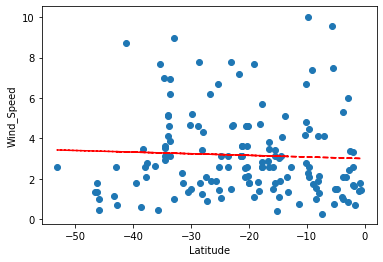

The r-squared is -0.05


In [21]:
Latitude = South_data['Lat']
Wind_Speed = South_data['Wind Speed']
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latitude, Wind_Speed)
vc_fit = vc_slope * Latitude + vc_int
plt.scatter(Latitude,Wind_Speed)
plt.plot(Latitude,vc_fit,"r--")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.savefig('Lat_vs_WindSpeed_S.png')
plt.show()
correlation = st.pearsonr(Latitude,Wind_Speed)
print(f"The r-squared is {round(correlation[0],2)}")